<a href="https://colab.research.google.com/github/Andchh/Smarkio_DS/blob/main/Smarkio_Respostas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Baixando o csv com os dados para análise
também é possível apenas anexar na aba "arquivos" ao lado esquerdo.

In [1]:
!wget "https://s3.amazonaws.com/gupy5/production/companies/634/emails/1614302730414/7b0075b0-77d1-11eb-9933-2573999db431/teste_smarkio_lbs.xls"

--2021-02-26 20:23:05--  https://s3.amazonaws.com/gupy5/production/companies/634/emails/1614302730414/7b0075b0-77d1-11eb-9933-2573999db431/teste_smarkio_lbs.xls
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1138176 (1.1M) [application/vnd.ms-excel]
Saving to: ‘teste_smarkio_lbs.xls’

teste_smarkio_lbs.x 100%[===================>]   1.08M  --.-KB/s    in 0.08s   

2021-02-26 20:23:05 (13.6 MB/s) - ‘teste_smarkio_lbs.xls’ saved [1138176/1138176]



#Importando bibliotecas necessárias

In [2]:
import pandas as pd
#import sweetviz as sv
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Carregando o arquivo em um dataframe
df = pd.read_excel("/content/teste_smarkio_lbs.xls")
df.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


#1 - Análise exploratória dos dados utilizando estatística descritiva e inferencial,considerando uma, duas e/ou mais variáveis;


##Tratando e preenchendo os valores nulos

In [4]:
#Quantos valores nulos?
df.isnull().sum()

Pred_class         0
probabilidade      0
status             0
True_class       462
dtype: int64

In [5]:
#Se true_class for nulo -> considerar o valor de pred_class.
#assim, vamos substituir na tabela os valores nulos pelos de pred_class.
#salva os valores de pred_class na variável pred_valores
pred_valores = {'True_class': df['Pred_class']}
#preenche os locais nulos com os valores de pred_class
df.fillna(value = pred_valores, inplace = True)

In [6]:
#checando se ainda existe nulos
df.isnull().sum()

Pred_class       0
probabilidade    0
status           0
True_class       0
dtype: int64

##Analisando os status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


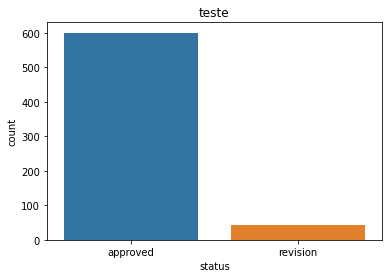

In [7]:
fig = plt.figure(figsize = (6,4))
plt.title("teste")
sns.countplot(df['status']);

In [8]:
#quantos aprovado ou revisados
df['status'].value_counts()

approved    600
revision     43
Name: status, dtype: int64

utilizando apenas os dados aprovados pelos cientistas

In [9]:
dados_approved = df[df['status'] == 'approved'].copy()
dados_approved

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,2.0
...,...,...,...,...
595,74,0.432421,approved,74.0
596,82,0.590576,approved,82.0
597,92,0.915543,approved,92.0
598,96,0.334495,approved,96.0


##Analisando true_class
Aqui vamos testar quais classes mais apareceram, se houve outliers e a distribuição das classes.

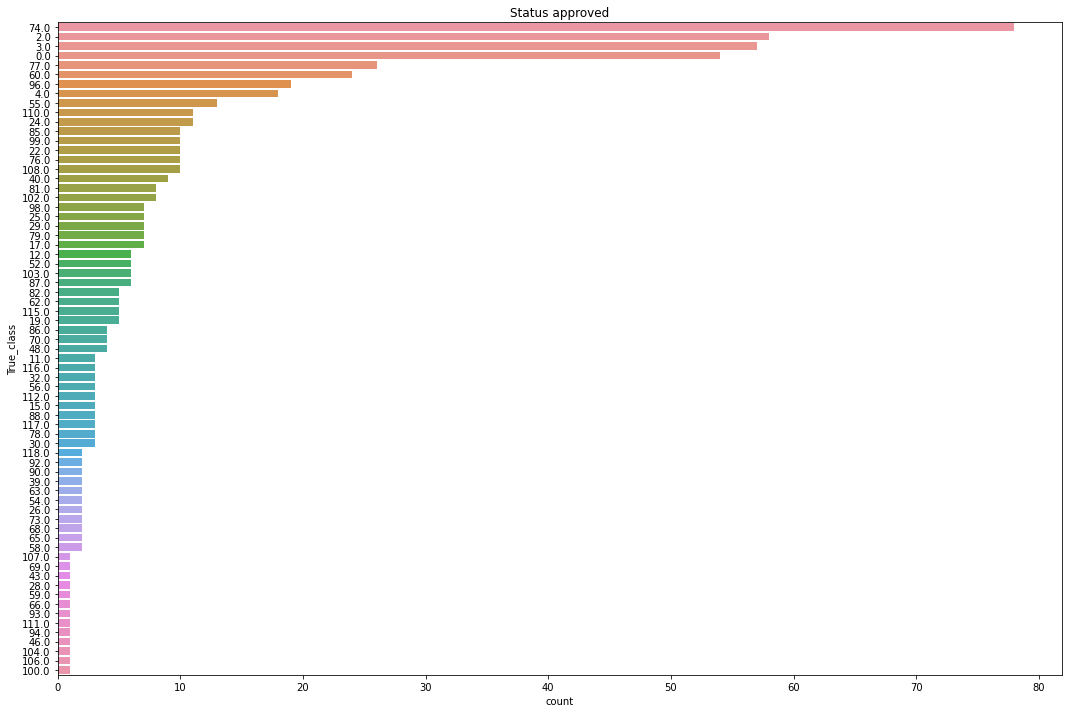

In [10]:
fig = plt.figure(figsize = (18, 12))
plt.title('Status approved')
sns.countplot(y = dados_approved['True_class'],
              orient = 'h', 
              order = dados_approved['True_class'].value_counts().index)

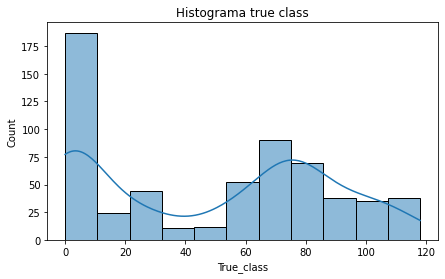

In [11]:
fig = plt.figure(figsize = (7,4))
plt.title("Histograma true class")
sns.histplot(dados_approved['True_class'], kde = True)

Podemos ver analisando os dois gráficos anteriores que as classes não são uniformemente distribuídas e também são assimétricas. 

Vemos que temos 69 classes aprovadas e 73 diferentes no total

In [12]:
dados_approved['True_class'].nunique()

69

In [13]:
df['True_class'].nunique()

73

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


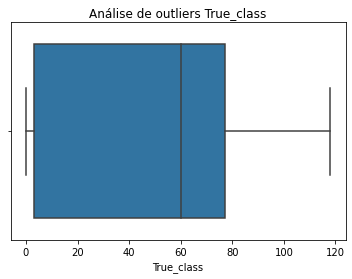

In [14]:
fig = plt.figure(figsize= (6,4))
plt.title('Análise de outliers True_class')
sns.boxplot(dados_approved['True_class']);

##Analisando pred_class

**Quantidade de classes?**

In [16]:
df['Pred_class'].unique().size

80

**Quais classes em pred_class teve mais acertos?**

Podemos ver que as classes 3, 2 e 74 foram as mais acertadas.

Text(0.5, 1.0, 'Porcentagem de pred_class')

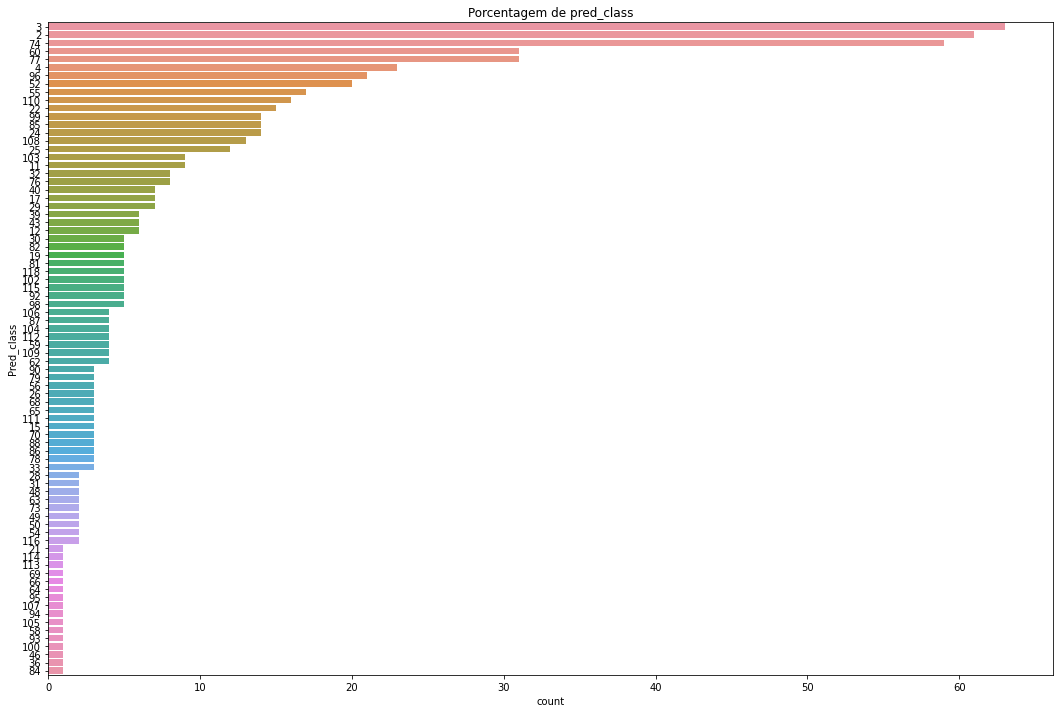

In [20]:
fig = plt.figure(figsize=(18,12))
sns.countplot(y = df['Pred_class'],
              orient = 'h',
              order = df['Pred_class'].value_counts().index)
plt.title('Porcentagem de pred_class')

**Há outliers em pred_class?**

Sem outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


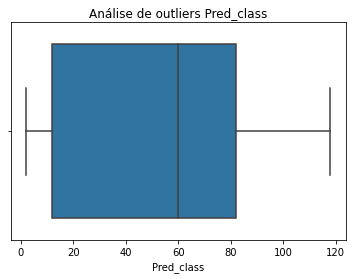

In [21]:
fig = plt.figure(figsize= (6,4))
plt.title('Análise de outliers Pred_class')
sns.boxplot(dados_approved['Pred_class']);

#2 - Calcule o desempenho do modelo de classificação utilizando pelo menos três métricas;

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

**Gerando matriz de confusão para visualizar falsos negativos e positivos, assim como a relação entre classes.**

Text(141.0, 0.5, 'True_class')

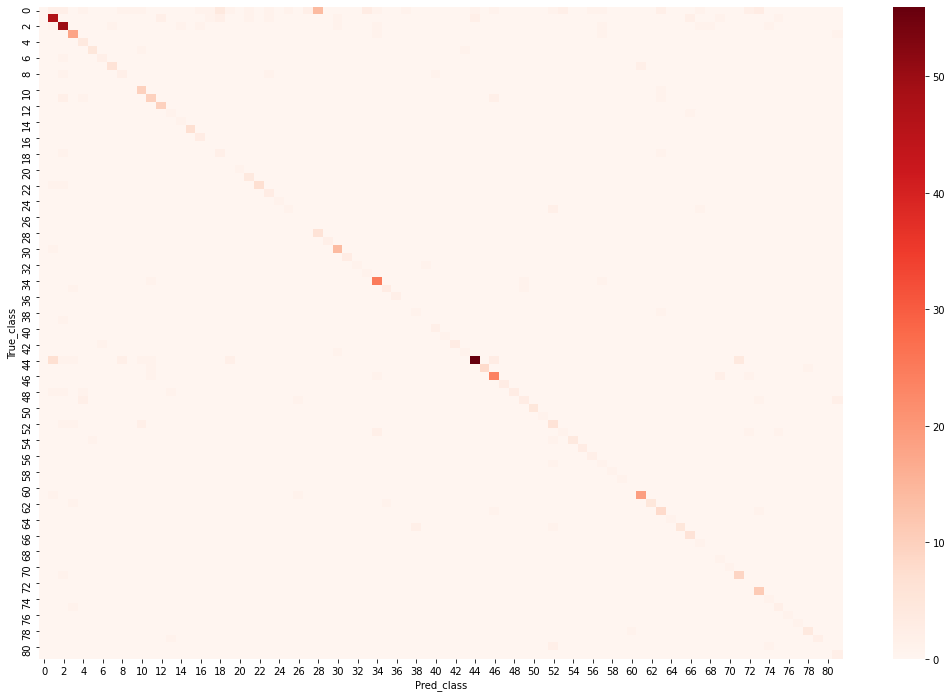

In [32]:
c_matrix = confusion_matrix(df['True_class'],
                            df['Pred_class'])
fig = plt.figure(figsize= (18 ,12))
sns.heatmap(c_matrix, cmap = 'Reds')
plt.xlabel('Pred_class')
plt.ylabel('True_class')

Na matriz de confusão é possível notar que existem áreas escuras (de maior incidência) fora da diagonal principal. 

Por exemplo o 44 foi confundido por 0 uma quantidade significativa de vezes.

**Obtendo a acurácia**

Aqui mostro a % de acertos

In [33]:
acc =  accuracy_score(df['True_class'],
                      df['Pred_class'])
acc

0.71850699844479

**Obtendo precisão**

Aqui mostro quanto acertou considerando falsos e verdadeiros positivos.

In [40]:
precision = precision_score(dados_approved['True_class'],
                            dados_approved['Pred_class'],
                            average = 'weighted')
precision

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6988175116236557

**Obtendo Recall**

Considerando falsos negativos e verdadeiros positivos

In [41]:
recall = precision_score(dados_approved['True_class'],
                         dados_approved['Pred_class'],
                         average = 'weighted')
recall 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6988175116236557

**Mostrando todas as métricas de todas as classes**

In [42]:
from sklearn.metrics import classification_report
print(classification_report(df.True_class, df.Pred_class))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         2.0       0.77      0.77      0.77        61
         3.0       0.79      0.83      0.81        60
         4.0       0.78      0.86      0.82        21
        11.0       0.44      1.00      0.62         4
        12.0       0.83      0.71      0.77         7
        15.0       0.67      0.67      0.67         3
        17.0       0.86      0.75      0.80         8
        19.0       0.40      0.40      0.40         5
        21.0       0.00      0.00      0.00         0
        22.0       0.67      0.91      0.77        11
        24.0       0.71      0.62      0.67        16
        25.0       0.83      1.00      0.91        10
        26.0       0.33      0.50      0.40         2
        28.0       0.50      1.00      0.67         1
        29.0       1.00      1.00      1.00         7
        30.0       0.60      1.00      0.75         3
        31.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#3 - Crie um classificador que tenha como output se os dados com status igual a revision estão corretos ou não (Sugestão : Técnica de  cross-validation K-fold);

In [43]:
#separando as variáveis de treinamento
x_train = dados_approved['Pred_class']
y_train = dados_approved['True_class']

In [44]:
#salvando os dados que contém revision e separando para teste do modelo
dados_revision = df[df['status'] == 'revision'].copy()

x_test = dados_revision['Pred_class']
y_test = dados_revision['True_class']

Transformando em array numpy para correção de dimensão

In [55]:

x_np_train = np.array(x_train)
x_np_train = x_np_train.reshape(-1,1)

x_np_test = np.array(x_test)
x_np_test = x_np_test.reshape(-1,1)


Agora treinando com random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(random_state = 23)

r_forest.fit(x_np_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)

Testando contra os dados de revision e salvando para visualizar


In [57]:
pred = r_forest.predict(x_np_test)
pred

array([  2.,  24.,  24.,  25.,  25.,  25.,   0.,  55.,  77.,  77.,   0.,
       115.,  11.,  24.,  60.,   2.,   3.,   4.,  22.,  24.,  39.,  39.,
         0.,  60.,  81.,  96., 112.,   2.,   3.,   3.,   4.,   4.,  12.,
        17.,  24.,  74.,   0.,  55.,  60.,  60.,  77.,  85.,  96.])

In [58]:
df_pred = pd.DataFrame({'True': y_test,
                        'Pred': pred})


Aqui é possível ver que o modelo acertou bastante

In [59]:
df_pred['Match'] = np.where(df_pred['True'] == df_pred['Pred'], 1,0)
df_pred

,True,Pred,Match
600,2.0,2.0,1
601,24.0,24.0,1
602,24.0,24.0,1
603,25.0,25.0,1
604,25.0,25.0,1
605,25.0,25.0,1
606,32.0,0.0,0
607,55.0,55.0,1
608,77.0,77.0,1
609,77.0,77.0,1


Quantos acertos?

In [70]:
df_pred['Match'].sum()

35

De quantas possibilidades?

In [71]:
df_pred.shape[0]

43

**Assim temos que acertou 35 de 43 ou 81,39%**



#4 - Compare três métricas de avaliação aplicadas ao modelo e descreva sobre a diferença;

##Acurácia
A acurácia é o informa o quanto o modelo acertou. Ela é calculada pela fórmula:
Acc = Acertos / (Acertos + erros)

##Precision
Ela é a razão entre o quanto foi classificado como positivo corretamente e o total de classificado como positivos. 

Precision = Positivos / (Positivos + Falsos Positivos)

##Recall
Inverso da Precision. Nele a ênfase são os falsos negativos. É calculada como:

Recall = Acertos positivos / (Acertos Positivos + Erros negativos)

In [72]:
#Comparando as métricas:
print(classification_report(df.True_class, df.Pred_class))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        54
         2.0       0.77      0.77      0.77        61
         3.0       0.79      0.83      0.81        60
         4.0       0.78      0.86      0.82        21
        11.0       0.44      1.00      0.62         4
        12.0       0.83      0.71      0.77         7
        15.0       0.67      0.67      0.67         3
        17.0       0.86      0.75      0.80         8
        19.0       0.40      0.40      0.40         5
        21.0       0.00      0.00      0.00         0
        22.0       0.67      0.91      0.77        11
        24.0       0.71      0.62      0.67        16
        25.0       0.83      1.00      0.91        10
        26.0       0.33      0.50      0.40         2
        28.0       0.50      1.00      0.67         1
        29.0       1.00      1.00      1.00         7
        30.0       0.60      1.00      0.75         3
        31.0       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#5 - Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, que permita identificar qual trecho de música corresponde às respectivas artistas listadas

Carregando os dados

In [73]:
dados_musica = pd.read_excel('/content/teste_smarkio_lbs.xls', 'NLP')
dados_musica.head()


,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé


In [75]:
#tempos 518 linhas e 2 artistas.
dados_musica.shape

(518, 2)

Aqui podemos ver que temos Beyoncé e Rihanna como artistas

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


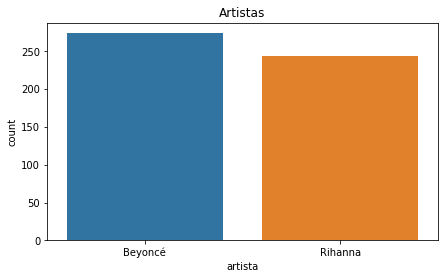

In [78]:
fig = plt.figure(figsize = (7,4))
plt.title('Artistas')
sns.countplot(dados_musica['artista']);

Agora vamos separar para o treinamento.
Nele teremos a letra como feature e o artista como o que deve ser acertado.
Também será usado naive_bayes

In [79]:
features = dados_musica['letra']
artistas = dados_musica['artista']


In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, artistas, test_size = 0.1)

utilizando bag of words

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

bag = CountVectorizer(stop_words = 'english')

x_train_bag = bag.fit_transform(x_train)
x_test_bag = bag.transform(x_test)

usando naive bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(x_train_bag, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

após treinado, testamos a acurácia.

In [84]:
pred = bayes.predict(x_test_bag)
np.mean(pred == y_test)

0.7307692307692307

Com isso obtivemos 73% de acerto.

Daqui é possível fazer um sistema de reconhecimento tendo as letras como input.